In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

#### Esercizi svolti da Stefano Polo

#### Matricola: 940175

#### Informazione sulla cartella contenente codici e risultati:
La struttura della cartella così come è presentata è funzionale per una compilazione semplice del *notebook*. Infatti tutti i risultati della simulazione sono disposti nella cartella <span style="color:red"> Risultati </span>. Di conseguenza al fine della compilazione del *notebook* non è necessario rieseguire la simulazione. Nella cartella <span style="color:red">Codice</span> è presentato il codice C++ per lo svolgimento dell'esercizio. La compilazione e l'esecuzione di quest'ultimp prevede l'automatica sovrascrittura dei file contenenti i risultati su quelli vecchi contenuti nella cartella <span style="color:red"> Risultati</span> (dunque un'esecuzione dei codici non richiede che i nuovi risultati vengano copiati a mano in <span style="color:red"> Risultati</span>).

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

#### Risultati analitici
Nella cella sottostante implemento il codice python per il risultato analitico della teoria di Black-Scholes; essa assume che l'evoluzione temporale del prezzo di un asset $S(t)$ segua un moto Browniano geometrico (GBM) con un tasso di interesse $r$ privo di rischio e volatilità $\sigma$. Nel caso di questo esecizio i parametri della teoria sono fissati nella seguente maniera:

- prezzo dell'asset a $t=0$: $S(0)=100$
- tempo di consegna: $T=1$
- prezzo di esercizio: $K=100$
- tasso di interesse privo di rischio: $r=0.1$
- volatilità: $\sigma=0.25$

I risultati esatti ottenuti nella cella sottostante mi saranno utili per il confronto dei valori che ho ricavato con la mia simulazione.

In [2]:
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == Soluzione analitica da BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == Soluzione analitica da BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


#### Risultati della simulazione Monte Carlo
Per la risoluzione dell'esercizio non ho fatto altro che implementare nel mio codice un metodo che simulasse l'evoluzione del prezzo dell'asset $S(t)$ nel tempo. Come menzionato precedentemente, $S(t)$, secondo la teoria di Black-Scholes, segue un moto Browniano geometrico e di conseguenza il suo campionamento risulta essere:

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right] \quad \text{con} \quad Z_i \sim \mathcal{N}(0,1)\, .$$
    
E' bene ricordare che questo metodo di campionamento è esatto, di conseguenza non ho errori di discretizzazione. 

Dunque per il calcolo della *call-option* $C\left[ S(t),t \right]$ e *put-option* $P\left[ S(t),t \right]$ europee al tempo $T$ ho adottato due metodi: 
- un campionamento diretto di $S(T)$. In tal caso la formula precedente si riduce ad essere: $S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$ con $W(t)\sim\mathcal{N}(0,t)$.

- un campionamento discreto dividendo l'intervallo temporale $[0,T]$ in $10^2$ invervallini.

Una volta lanciata la simulazione per $M = 10^4$ volte e ottenuto il valore di $S(T)$ con entrambi i metodi, ho calcolato il valore della *call-option* e *put-option* in questo modo:

$$C\left[ S(T),T \right] = e^{-rT}\max\left[0,S(T)-K\right]$$ e 
$$P\left[ S(T),T \right] = e^{-rT}\max\left[0,K-S(T)\right]$$

Nell cella sottostante presento i prezzi da assegnare alla *call-option* e alla *put-option* europee al tempo $t=T$ calcolati mediante il metodo del *data blocking* con $N_{block} = 10^2$ blocchi. Ho confrontato i risultati ottenuti con i valori esatti ottenuti dalla risoluzione analitica dell'equazione di Black-Scholes. Si osserva come entrambi i metodi di campionamento sia per *put-option* sia per *call-option* convergano al valore esatto. In particolare la $P\left[ S(T),T \right]$  presenta una convergenza migliore

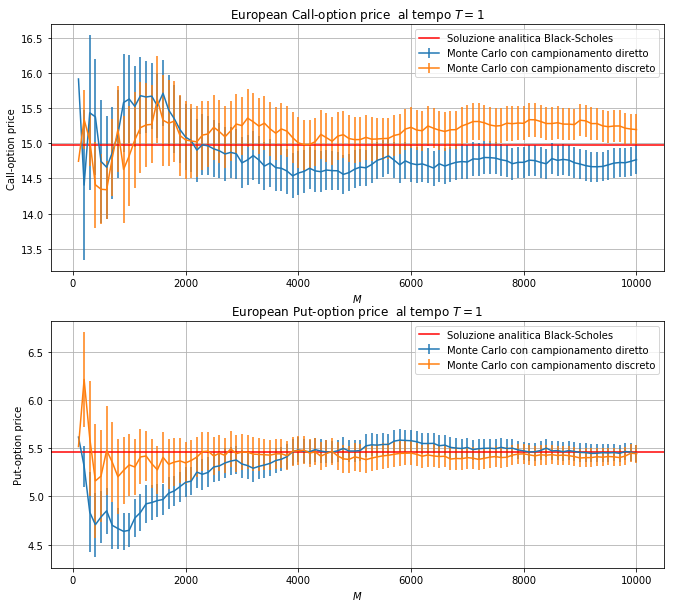

In [38]:
plt.figure(figsize=(11,10))

plt.subplot(2,1,1)
N, r, error = np.loadtxt('Risultati/Risultati_diretto_Call.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N,r,yerr=error, label = 'Monte Carlo con campionamento diretto')
plt.axhline(y=call,linestyle='-',color = 'red',label = 'Soluzione analitica Black-Scholes')
N, r, error = np.loadtxt('Risultati/Risultati_discreto_Call.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N,r,yerr=error,label = 'Monte Carlo con campionamento discreto')
plt.xlabel('$M$')
plt.ylabel('Call-option price')
plt.title('European Call-option price  al tempo $T = 1$')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
N, r, error = np.loadtxt('Risultati/Risultati_diretto_Put.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N,r,yerr=error, label = 'Monte Carlo con campionamento diretto')
plt.axhline(y=put,linestyle='-',color = 'red',label = 'Soluzione analitica Black-Scholes')
N, r, error = np.loadtxt('Risultati/Risultati_discreto_Put.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N,r,yerr=error,label = 'Monte Carlo con campionamento discreto')
plt.xlabel('$M$')
plt.ylabel('Put-option price')
plt.title('European Put-option price  al tempo $T = 1$')
plt.legend()
plt.grid(True)
plt.show()